# Loading the Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

df = pd.read_csv("data.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Cleaning the data

In [2]:
df.drop(['Unnamed: 32'], axis=1, inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Model Training.

## Splitting the data into train-test sets.

In [3]:
#Seperating the X and y features.
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, random_state=13)

## Standardizing the testing and training dataset features.

In [4]:
ss = sk.preprocessing.StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

## Fitting the Logistic Regression Model.

In [5]:
model = sk.linear_model.LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

# Model Evaluation.

In [6]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, accuracy_score

y_pred = model.predict(X_test_scaled)

## Confusion Matrix.

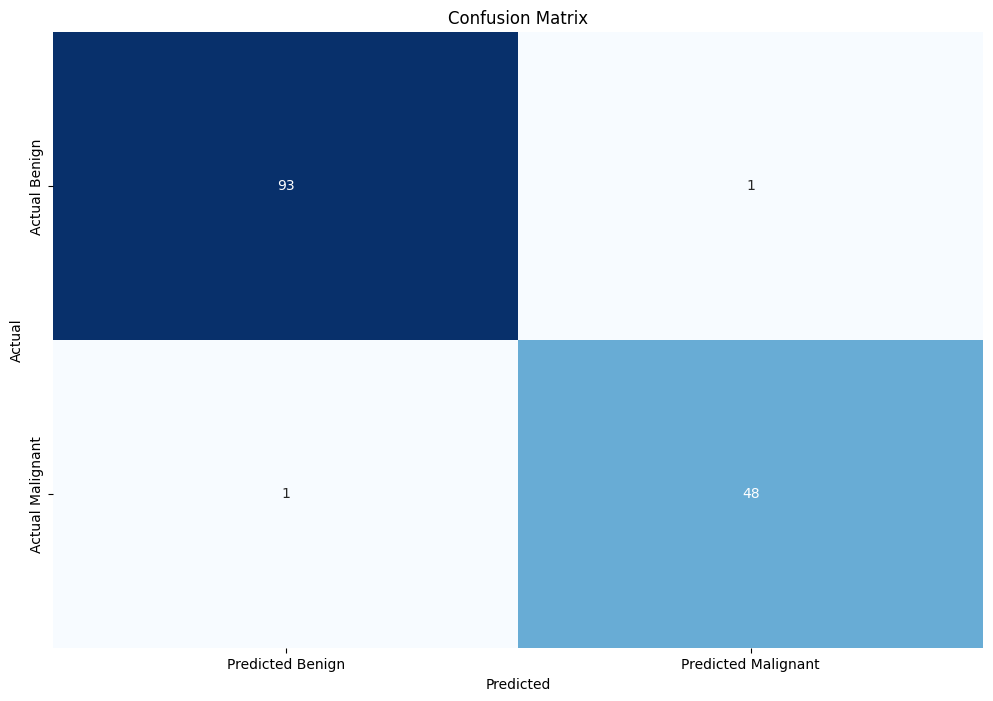

In [7]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Benign', 'Predicted Malignant'],
            yticklabels=['Actual Benign', 'Actual Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Precision, Recall, ROC-AUC

In [8]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Precision: 0.98
Recall: 0.98
ROC-AUC: 1.00
Accuracy: 0.99


# Model Optimization.

In [9]:
import numpy as np
y_prob = model.predict_proba(X_test_scaled)[:, 1]

thresholds = np.arange(0.1, 1, 0.05)
f1_scores = []
for threshold in thresholds:
    y_pred_threshold = (y_prob >= threshold).astype(int)
    y_pred_labels = np.where(y_pred_threshold == 1, 'M', 'B')
    f1 = sk.metrics.f1_score(y_test, y_pred_threshold)
    f1_scores.append(f1)

optimal_threshold = thresholds[np.argmax(f1_scores)]
optimal_f1_score = f1_scores[np.argmax(f1_scores)]

print(f"Optimal Threshold: {optimal_threshold:.2f}")
print(f"Optimal F1 Score: {optimal_f1_score:.2f}")

Optimal Threshold: 0.50
Optimal F1 Score: 0.98


### Variation of F1 score versus Threshold.

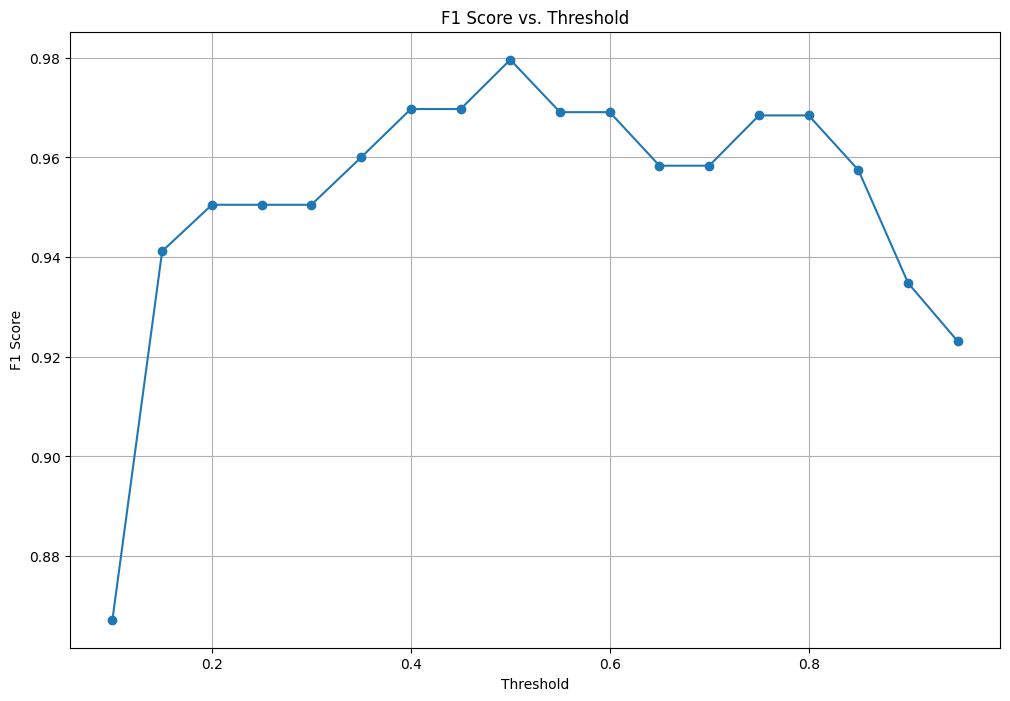

In [10]:
plt.figure(figsize=(12, 8))
plt.plot(thresholds, f1_scores, marker='o')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold')
plt.grid()
plt.show()

### Sigmoid Function.
Sigmoid function is used to map predicted values to probabilities in Logistic Regression.

σ(z) = $\frac{1}{1+e^{-z}}$

Usually a threshold of 0.5 is used to convert the probability into a binary prediction, namely 0, and 1.
Here, we tuned the threshold to 0.58 to get the maximum F1 score for the Logistic Regression Model.